In [1]:
"""
Use the following augmentation methods on the sample image under data/sample.png
and save the result under this path: 'data/sample_augmented.png'

Note:
    - use torchvision.transforms
    - use the following augmentation methods with the same order as below:
        * affine: degrees: ±5, 
                  translation= 0.1 of width and height, 
                  scale: 0.9-1.1 of the original size
        * rotation ±5 degrees,
        * horizontal flip with a probablity of 0.5
        * center crop with height=320 and width=640
        * resize to height=160 and width=320
        * color jitter with:  brightness=0.5, 
                              contrast=0.5, 
                              saturation=0.4, 
                              hue=0.2
    - use default values for anything unspecified
"""

import torch
from torchvision import transforms as T
import numpy as np
import cv2


torch.manual_seed(8)
np.random.seed(8)

#img = cv2.imread('data/sample.png')


In [2]:
# write your code here ...

#importing libraries
from PIL import Image 
import PIL 
from matplotlib import pyplot as plt

# This function will read the image using its path with opencv
def Load_Image(Path):
    img = cv2.imread(Path)[:,:,::-1] # opencv read the images in BGR format 
                                    # so we use [:,:,::-1] to convert from BGR to RGB
    return img

img = Load_Image('/content/sample.png')

In [3]:
# This function will be used to show the original as well as the transformed image with respective titles

def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

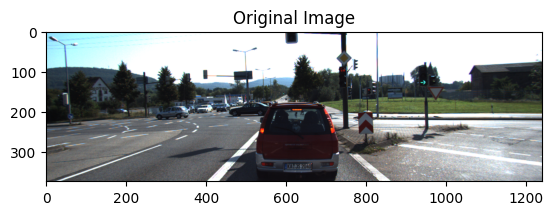

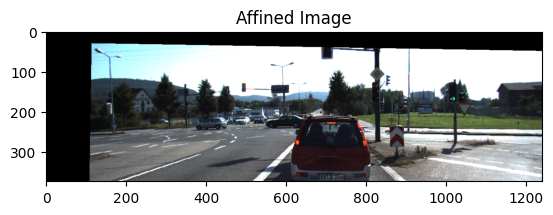

In [4]:
# 1 - Affine transformation 

Affine_Transformation = T.Compose([
   T.ToPILImage(), # the transform usually works with PIL images
   T.RandomAffine(degrees=(-5, +5),translate=(0.1, 0.1), scale=(0.9, 1.1))
])

# Testing The Transformation...
Affined_Img = Affine_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(Affined_Img, 'Affined Image')

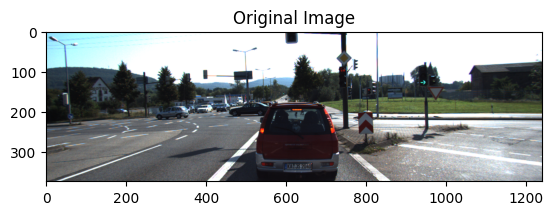

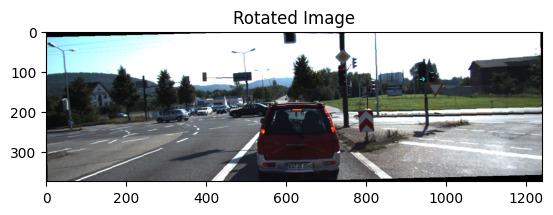

In [6]:
# 2 - Rotation

Rotate_Transformation = T.Compose([
    T.ToPILImage(),
    T.RandomRotation(degrees=(-5,+5))
])

# Testing The Transformation...
Rotated_Img = Rotate_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(Rotated_Img, 'Rotated Image')

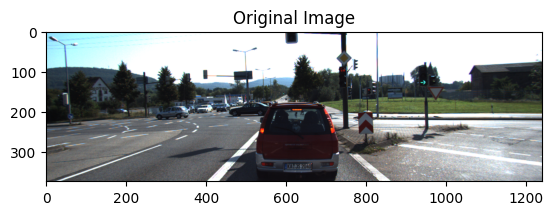

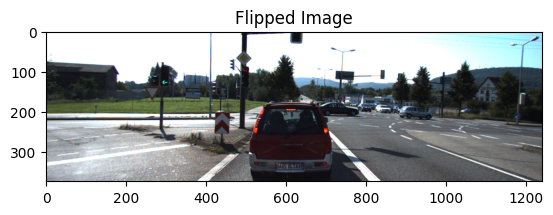

In [9]:
# 3 - Horizontal Flip Transformation

Horizontal_Flipping_Transformation = T.Compose([
    T.ToPILImage(), # the transform usually work with PIL images
    T.RandomHorizontalFlip(p=0.5) 
])

# Testing The Transformation...
Flipping_Img = Horizontal_Flipping_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

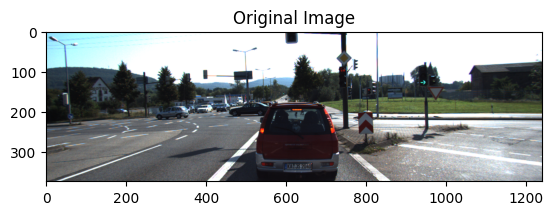

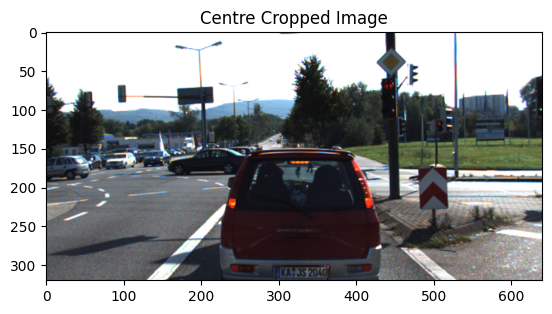

In [8]:
# 4 - Centre Crop Transformation

CentreCrop_Transformation = T.Compose([
    T.ToPILImage(), # the transform usually work with PIL images
    T.CenterCrop((320,640))
])

# Testing The Transformation...
CentreCropped_Img = CentreCrop_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(CentreCropped_Img, 'Centre Cropped Image')

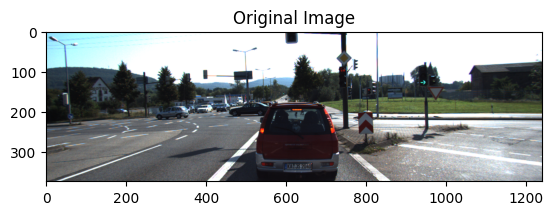

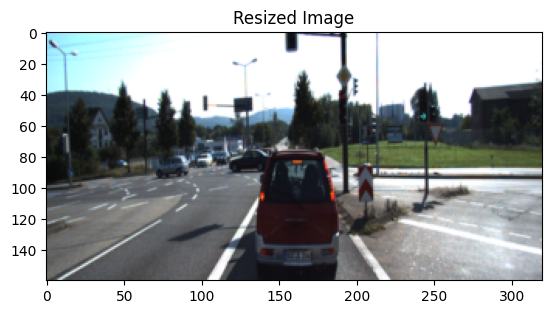

In [10]:
# 5 - Resize Transformation

Resize_Transformation = T.Compose([
   T.ToPILImage(), # the transform usually work with PIL images
   T.Resize(size=(160,320))
])

# Testing The Transformation...
Resized_Img = Resize_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')

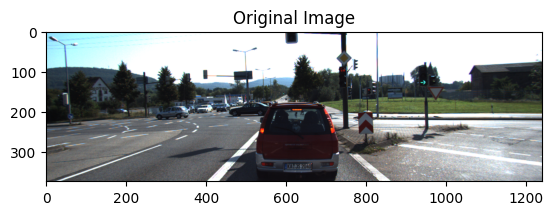

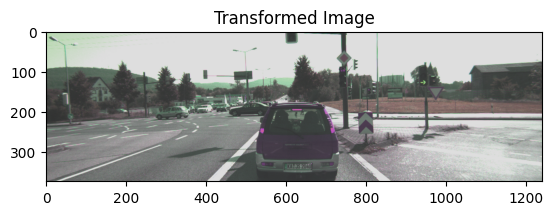

In [11]:
# 6 - Colour Jitter Transformation

Color_Transformation = T.Compose([
    T.ToPILImage(), # the transform usually work with PIL images
    T.ColorJitter(brightness=0.5, contrast=0.5,saturation=0.4, hue=0.2)
])

# Testing The Transformation...
Transformed_Img = Color_Transformation(img)
Show_Image(img, 'Original Image')
Show_Image(Transformed_Img, 'Transformed Image')

In [12]:
#Transformations have been applied sequentially on the same original image

seq_img = Image.open('/content/sample.png')

transforms = torch.nn.Sequential(
    T.RandomAffine(degrees=(-5, +5),translate=(0.1, 0.1), scale=(0.9, 1.1)),
    T.RandomRotation(degrees=(-5,+5)),
    T.RandomHorizontalFlip(p=0.5),
    T.CenterCrop((320,640)),
    T.Resize(size=(160,320)),
    T.ColorJitter(brightness=0.5, contrast=0.5,saturation=0.4, hue=0.2)
) 

Transformed_Img = transforms(seq_img)

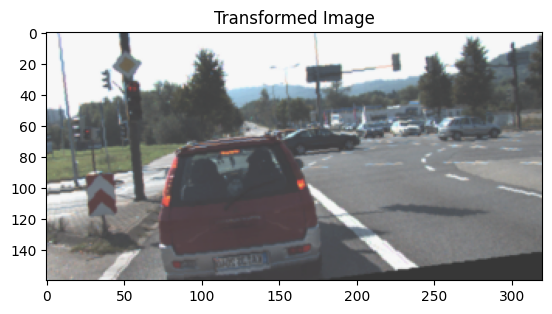

In [13]:
Show_Image(Transformed_Img, 'Transformed Image')

In [14]:
Transformed_Img.save("/content/sample_augmented.png")